# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from pandas_profiling import ProfileReport

In [72]:
startDate = '1992-01-01'

In [73]:
def formatDates(data, position):
    dates = []
    for index, row in data.iterrows():
        dates.append(str(row[position])[:8] + '01')
    return dates

# All EU Dataset

In [74]:
EUdata = pd.read_csv('data/apro_mt_pwgtm_1_Data.csv')
EUdata = EUdata[EUdata['UNIT'] == 'Thousand tonnes']
EUdata = EUdata[['TIME', 'GEO', 'MEAT', 'Value']]
EUdata.columns = ['Date', 'Country', 'Meat', 'Value']

EUdata.Date = pd.to_datetime(EUdata.Date, format='%YM%m')
EUdata = EUdata[EUdata.Date >= startDate]

EUdata['Country'] = EUdata['Country'].str.slice(0,7)
EUdata = EUdata.replace([':'], 0, regex=True)
EUdata['Value'] = EUdata['Value'].astype(float)

EUdata.reset_index(inplace=True, drop=True)

EUdata

Date  Country          Meat   Value
0    1992-01-01  Germany   Bovine meat  159.17
1    1992-01-01  Germany       Pigmeat  323.24
2    1992-01-01  Germany          Lamb    0.00
3    1992-01-01  Germany  Poultry meat    0.00
4    1992-01-01  Ireland   Bovine meat   35.00
...         ...      ...           ...     ...
2899 2022-03-01  Germany  Poultry meat    0.00
2900 2022-03-01  Ireland   Bovine meat   53.35
2901 2022-03-01  Ireland       Pigmeat   30.83
2902 2022-03-01  Ireland          Lamb    5.05
2903 2022-03-01  Ireland  Poultry meat   12.00

[2904 rows x 4 columns]

In [75]:
EUdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2904 non-null   datetime64[ns]
 1   Country  2904 non-null   object        
 2   Meat     2904 non-null   object        
 3   Value    2904 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 90.9+ KB


In [76]:
animalTypes = EUdata['Meat'].unique()
animalTypes[1] = 'Pig Meat'
animalTypes[2] = 'Lamb Meat'
animalTypes

array(['Bovine meat', 'Pig Meat', 'Lamb Meat', 'Poultry meat'],
      dtype=object)

# Ireland Slaughter Data

In [77]:
irelandData = EUdata[EUdata['Country'] == 'Ireland'].reset_index(drop=True)
irelandData = irelandData.pivot_table(index='Date', columns='Meat', values='Value')
irelandData.reset_index(inplace=True)
irelandData.set_index('Date',inplace=True)
irelandData.columns = 'Ireland ' + animalTypes
irelandData

Ireland Bovine meat  Ireland Pig Meat  Ireland Lamb Meat  \
Date                                                                   
1992-01-01                35.00              5.10              17.90   
1992-02-01                31.90              4.20              15.00   
1992-03-01                46.70              3.70              16.50   
1992-04-01                40.00              4.60              16.00   
1992-05-01                33.80              6.40              15.90   
...                         ...               ...                ...   
2021-11-01                56.15              4.99              31.48   
2021-12-01                45.58              5.05              27.03   
2022-01-01                47.36              4.32              28.01   
2022-02-01                49.77              4.62              28.80   
2022-03-01                53.35              5.05              30.83   

            Ireland Poultry meat  
Date                              
1992-01-01                  0.00  
1992-02-01                  0.00  
1992-03-01                  0.00  
1992-04-01                  0.00  
1992-05-01                  0.00  
...                          ...  
2021-11-01                 13.39  
2021-12-01                 20.65  
2022-01-01                 12.81  
2022-02-01                 12.54  
2022-03-01                 12.00  

[363 rows x 4 columns]

## Ireland Data NaN Count

In [66]:
irelandData.isna().sum()

Ireland Bovine meat     0
Ireland Pig Meat        0
Ireland Lamb Meat       0
Ireland Poultry meat    0
dtype: int64

## Ireland Data Box Plot

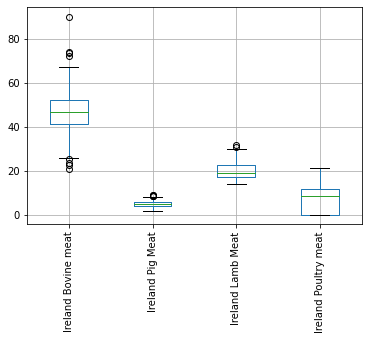

In [67]:
irelandData.boxplot(rot=90);

In [68]:
#https://plotly.com/python/box-plots/
fig = px.box(irelandData)
fig.show()

In [69]:
fig = px.box(irelandData, points='all')
fig.show()

## Profile Report

In [13]:
ProfileReport(irelandData)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Ireland Slaughter Plot

In [70]:
fig = px.line(irelandData, labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Ireland', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Ireland Slaughter Growth Plot

In [71]:
fig = px.line(irelandData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Ireland', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Ireland Poputlain Data

In [78]:
irelandPop = pd.read_csv('data/POPTOTIEA647NWDB.csv', 
                         parse_dates=['DATE'])
irelandPop.columns = ['Date','Ireland Population']
irelandPop = irelandPop[irelandPop.Date >= startDate]

In [79]:
irelandPop = irelandPop.resample('M', on='Date').sum()

irelandPop['Ireland Population'].replace(0, method='ffill', inplace=True)
irelandPop.reset_index(inplace=True)
irelandPop.Date = pd.date_range(startDate, irelandPop.iloc[-1,:][0], periods=len(irelandPop))
irelandPop.Date = formatDates(irelandPop, 0)
irelandPop.Date = pd.to_datetime(irelandPop.Date)
irelandPop.sort_values('Date', inplace=True)
irelandPop.set_index('Date',inplace=True)

# Germany Slaughter Data

In [81]:
germanData = EUdata[EUdata['Country'] == 'Germany'].reset_index(drop=True)
germanData = germanData.pivot_table(index='Date', columns='Meat', values='Value')
germanData.reset_index(inplace=True)
germanData.set_index('Date',inplace=True)
germanData.columns = 'Germany ' + animalTypes
germanData

Germany Bovine meat  Germany Pig Meat  Germany Lamb Meat  \
Date                                                                   
1992-01-01               159.17               0.0             323.24   
1992-02-01               140.11               0.0             285.40   
1992-03-01               164.54               0.0             316.98   
1992-04-01               155.61               0.0             297.46   
1992-05-01               144.82               0.0             300.15   
...                         ...               ...                ...   
2021-11-01               104.00               2.0             421.00   
2021-12-01                91.00               2.0             413.00   
2022-01-01                77.00               1.0             384.00   
2022-02-01                78.00               1.0             371.00   
2022-03-01                 0.00               0.0               0.00   

            Germany Poultry meat  
Date                              
1992-01-01                   0.0  
1992-02-01                   0.0  
1992-03-01                   0.0  
1992-04-01                   0.0  
1992-05-01                   0.0  
...                          ...  
2021-11-01                 137.0  
2021-12-01                 141.0  
2022-01-01                 129.0  
2022-02-01                 117.0  
2022-03-01                   0.0  

[363 rows x 4 columns]

## Germany NaN Count

In [82]:
germanData.isna().sum()

Germany Bovine meat     0
Germany Pig Meat        0
Germany Lamb Meat       0
Germany Poultry meat    0
dtype: int64

## Germany Data Box Plot

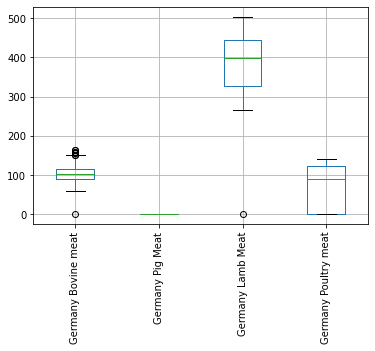

In [83]:
germanData.boxplot(rot=90);

In [84]:
#https://plotly.com/python/box-plots/
fig = px.box(germanData)
fig.show()

In [85]:
fig = px.box(germanData, points='all')
fig.show()

## German Profile Report

In [ ]:
ProfileReport(germanData)

## Germany Slaughter Plot

In [86]:
fig = px.line(germanData, labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Germany Slaughter Growth Plot

In [87]:
fig = px.line(germanData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Germany Population Data

In [88]:
germanyPop = pd.read_csv('data/POPTOTDEA647NWDB.csv',
                    parse_dates=['DATE'])
germanyPop.columns = ['Date','German Population']
germanyPop = germanyPop[germanyPop.Date >= startDate]

In [89]:
germanyPop = germanyPop.resample('M', on='Date').sum()

germanyPop['German Population'].replace(0, method='ffill', inplace=True)
germanyPop.reset_index(inplace=True)
germanyPop.Date = pd.date_range(startDate, germanyPop.iloc[-1,:][0], periods=len(germanyPop))
germanyPop.Date = formatDates(germanyPop, 0)
germanyPop.Date = pd.to_datetime(germanyPop.Date)
germanyPop.sort_values('Date', inplace=True)
germanyPop.set_index('Date',inplace=True)

# USA Slaughter Data

In [18]:
usaData = pd.read_excel('data/MeatStatsFullUSA.xlsx', sheet_name='SlaughterWeights-Full',
                   skiprows=2)
dates = usaData.iloc[:,0]

usaData = usaData.iloc[:, 13:]
usaData.insert(loc=0, column='Date', value=dates)
usaData.drop(columns='Unnamed: 15', inplace=True)
usaData.drop(usaData.tail(6).index, inplace=True)
usaData.drop(usaData.head(2).index, inplace=True)
usaData.Date = pd.to_datetime(usaData.Date, format='%b-%Y')
usaData = usaData[usaData.Date >= '2003-01-01'].reset_index(drop=True)

usaData.index = usaData.Date
usaData.drop(columns='Date', inplace=True)
usaData

Cattle.2  Steers  Heifers   Cows  Bulls and stags  Calves.2  \
Date                                                                      
2022-03-01     836.0   914.0    845.0  655.0            879.0     151.0   
2022-02-01     842.0   922.0    850.0  658.0            880.0     139.0   
2022-01-01     843.0   926.0    852.0  649.0            871.0     142.0   
2021-12-01     841.0   927.0    852.0  635.0            860.0     136.0   
2021-11-01     837.0   923.0    846.0  621.0            855.0     139.0   
...              ...     ...      ...    ...              ...       ...   
2003-05-01     733.0   781.0    708.0  594.0            925.0     210.0   
2003-04-01     731.0   781.0    710.0  598.0            919.0     205.0   
2003-03-01     745.0   798.0    738.0  598.0            924.0     195.0   
2003-02-01     764.0   821.0    759.0  602.0            935.0     195.0   
2003-01-01     769.0   832.0    769.0  597.0            922.0     191.0   

            Hogs.2  Sheep and lambs.2  Unnamed: 22  
Date                                                
2022-03-01   218.0               68.0          NaN  
2022-02-01   218.0               67.0          NaN  
2022-01-01   219.0               66.0          NaN  
2021-12-01   218.0               64.0          NaN  
2021-11-01   216.0               64.0          NaN  
...            ...                ...          ...  
2003-05-01   200.0               69.0          NaN  
2003-04-01   200.0               67.0          NaN  
2003-03-01   200.0               70.0          NaN  
2003-02-01   199.0               68.0          NaN  
2003-01-01   200.0               68.0          NaN  

[231 rows x 9 columns]

## Animal Types

In [19]:
animalTypes = np.array(['Cattle', 'Steers', 'Heifers', 'Cows', 'Bulls and stags',
               'Calves', 'Hogs', 'Sheep and lambs'], dtype=object)
animalTypes = 'USA ' + animalTypes
animalTypes

array(['USA Cattle', 'USA Steers', 'USA Heifers', 'USA Cows',
       'USA Bulls and stags', 'USA Calves', 'USA Hogs',
       'USA Sheep and lambs'], dtype=object)

In [20]:
usaData.columns=animalTypes
usaData

ValueError: Length mismatch: Expected axis has 9 elements, new values have 8 elements

## USA Data NaN Count

In [ ]:
usaData.isna().sum()

## USA Data Box Plot

In [ ]:
usaData.boxplot(rot=90);

In [ ]:
#https://plotly.com/python/box-plots/
fig = px.box(usaData)
fig.show()

In [ ]:
fig = px.box(usaData, points='all')
fig.show()

## USA Profile Report

In [ ]:
ProfileReport(usaData)

## Convert USA Data to Tonne

In [ ]:
usaData = (usaData * 1000) / 2204.6
usaData

## USA Slaughter Plot

In [ ]:
fig = px.line(usaData, labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings USA', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## USA Slaughter Growth Plot

In [ ]:
fig = px.line(usaData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth USA', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## USA Population Data

In [ ]:
usaPop = pd.read_csv('data/POPTOTUSA647NWDB.csv',
                    parse_dates=['DATE'])
usaPop.columns = ['Date','USA Population']
usaPop = usaPop[usaPop.Date >= startDate]

In [ ]:
usaPop = usaPop.resample('M', on='Date').sum()
usaPop['USA Population'].replace(0, method='ffill', inplace=True)
usaPop.reset_index(inplace=True)
usaPop.Date = pd.date_range(startDate, usaPop.iloc[-1,:][0], periods=len(usaPop))
usaPop.Date = formatDates(usaPop, 0)
usaPop.Date = pd.to_datetime(usaPop.Date)
usaPop.sort_values('Date', inplace=True)
usaPop.set_index('Date',inplace=True)

# Merge Datasets

In [ ]:
allData = pd.concat([irelandData, usaData, germanDataCleaned], axis=1)
allData.dropna(inplace=True)
allData

In [ ]:
fig = px.line(allData,
             labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Ireland USA & Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## All Data Growth Plot

In [ ]:
fig = px.line(allData.pct_change().cumsum(),
             labels={'value': 'Percentage Growth',
                    'Month':'Date'})
fig.update_layout(title_text='Livestock Slaughterings Growth Ireland, USA & Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

In [ ]:
fig = px.box(allData.filter(items=allData.columns[allData.columns.str.contains("Hogs",regex=True)]))
fig.show()

In [ ]:
fig = px.line(allData.filter(items=allData.columns[allData.columns.str.contains("Hogs",regex=True)]),
             labels={'value': 'Tonne in thousands',
                    'Month':'Date'})
fig.update_layout(title_text='Hog Slaughters Ireland & USA', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

In [ ]:
fig = px.line(allData.filter(items=allData.columns[allData.columns.str.contains("Hogs",regex=True)]).pct_change().cumsum(),
             labels={'value': 'Percentage Growth Since 2003',
                    'Month':'Date'})
fig.update_layout(title_text='Hogs Slaughterings Growth Ireland, USA, Germany', 
                  title_x=0.5, legend_title='Livestock')
fig.show()

## Population Data

In [ ]:
allPopulationData = pd.concat([irelandPop, usaPop, germanyPop], axis=1)
allPopulationData.fillna(method='ffill', inplace=True)
allPopulationData

In [ ]:
allPopulationData.boxplot(rot=90);

In [ ]:
fig = px.line(allPopulationData[['Ireland Population', 'USA Population', 'German Population']].pct_change().cumsum(),
             labels={'value': 'Percentage Population Growth',
                    'Date':'Date'})
fig.update_layout(title_text='Population Percentage Growth Ireland, USA, & Germany', 
                  title_x=0.5, legend_title='Population')
fig.show()

# Cattle Data

In [ ]:
cattle = allData.filter(items=allData.columns[allData.columns.str.contains("Cattle",regex=True)])
cattle.drop(cattle.tail(len(allData) - len(irelandPop)).index, inplace=True)

cattleData = pd.DataFrame()
cattleData['Ireland Per Capita Cattle Production'] = cattle['Ireland Cattle'].values / irelandPop['Ireland Population'].values * 1000000
cattleData['USA Per Capita Cattle Production'] = cattle['USA Cattle'].values / usaPop['USA Population'].values * 1000000
cattleData['Germany Per Capita Cattle Production'] = cattle['German Cattle'].values / germanyPop['German Population'].values * 1000000

In [ ]:
fig = px.line(cattleData.pct_change().cumsum(),
             labels={'value': 'Percentage Cattle Slaughter Growth',
                    'Date':'Date'})
fig.update_layout(title_text='Cattle Percentage Growth Per Capita in Ireland, USA, & Germany', 
                  title_x=0.5, legend_title='Per Capita Production')
fig.show()

In [ ]:
cattleData.boxplot(rot=90)

# Hog Data

In [ ]:
hogs = allData.filter(items=allData.columns[allData.columns.str.contains("Hogs",regex=True)])
hogs.drop(hogs.tail(len(allData) - len(irelandPop)).index, inplace=True)

hogsData = pd.DataFrame()
hogsData['Ireland Per Capita Hog Production'] = hogs['Ireland Hogs'].values / irelandPop['Ireland Population'].values * 1000000
hogsData['USA Per Capita Hog Production'] = hogs['USA Hogs'].values / usaPop['USA Population'].values * 1000000
hogsData['Germany Per Capita Hog Production'] = hogs['German Hogs'].values / germanyPop['German Population'].values * 1000000

In [ ]:
fig = px.line(hogsData.pct_change().cumsum(),
             labels={'value': 'Percentage Hog Slaughter Growth',
                    'Date':'Date'})
fig.update_layout(title_text='Pig Percentage Growth Per Capita in Ireland, USA, & Germany', 
                  title_x=0.5, legend_title='Population')
fig.show()

In [ ]:
hogsData.boxplot(rot=90);

# Lamb Data

In [ ]:
lamb = allData.filter(items=allData.columns[allData.columns.str.contains("Sheep",regex=True)])
lamb.drop(lamb.tail(len(allData) - len(irelandPop)).index, inplace=True)
lamb.drop(columns='Ireland Sheep', inplace=True)

lambData = pd.DataFrame()
lambData['Ireland Per Capita Lamb Production'] = lamb['Ireland Sheep and lambs'].values / irelandPop['Ireland Population'].values * 1000000
lambData['USA Per Capita Lamb Production'] = lamb['USA Sheep and lambs'].values / usaPop['USA Population'].values * 1000000
lambData['Germany Per Capita Lamb Production'] = lamb['German Sheep and lambs'].values / germanyPop['German Population'].values * 1000000

In [ ]:
fig = px.line(lambData.pct_change().cumsum(),
             labels={'value': 'Percentage Lamb Slaughter Growth',
                    'Date':'Date'})
fig.update_layout(title_text='Lamb Percentage Growth Per Capita in Ireland, USA, & Germany', 
                  title_x=0.5, legend_title='Population')
fig.show()

In [ ]:
lambData.boxplot(rot=90);